# 데이터셋

큰 비용 , 많은 시간 , 모은 데이터셋을 최대한 활용하자 -> Data Augmentation
![image.png](1.png)

In [6]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/JI8saFjK84o"></iframe>')

# Vimeo
#HTML('<iframe src="https://player.vimeo.com/video/26763844?title=0&byline=0&portrait=0" width="700" height="394" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe><p><a href="https://vimeo.com/26763844">BAXTER DURY - CLAIRE (Dir Cut)</a> from <a href="https://vimeo.com/dannysangra">Danny Sangra</a> on <a href="https://vimeo.com">Vimeo</a>.</p>')


# 다양한 image agumentation 방법
https://www.tensorflow.org/tutorials/images/data_augmentation

## Flipping
이미지 대칭 기능 (좌우 , 상하) - Classification 에서는 문제가 없지만

object detection , segmentation 문제 등에 대해서는 라벨도 좌우 반전해줘야 함

알파벳에서 주의해야 함

![image.png](2.png)

## Gray scale

3가지 채널의 RGB 이미지를 하나의 채널을 가지도록 해줌

아래 이미지는 흑백 대신 다른 색상으로 표현 , RGB 각각의 채널마다 가중치를 주어 가중합

을 했음.

![image.png](3.png)

## Saturation

RGB 이미지를 HSV(Hue(색조), Saturation(채도), Value(명도)의 3가지 성분색표현)

S 채널에 offset을 적용하여 이미지를 선명하게 만들어 줌 

이후 다시 RGB로 변경
![image.png](4.png)

## Brightness
밝기를 조절할 수도 있습니다. 우리가 주로 사용하는 RGB에서 (255,255,255)는 흰색을, (0,0,0)은 검은색을 의미합니다. 따라서 이미지는 RGB 채널에서 값을 더해주면 밝아지고, 빼주면 어두워집니다. 이를 통해서 Brightness를 변경할 수 있습니다.

![image.png](5.png)

## Rotation
이미지 각도 변환 , 90도는 괜찮은데 90도가 아닌 경우 , 직사각형 이 채우지 못하는 이미지

영역을 어떻게 해야할 지 고민
![image.png](6.png)

## Center Crop

중앙 확대

![image.png](7.png)

In [7]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/project/AIFFEL_Study/Going_Deeper/gc3_data_augmentation/images/mycat.jpg'
sample_img_path

'/home/aiffel0042/project/AIFFEL_Study/Going_Deeper/gc3_data_augmentation/images/mycat.jpg'

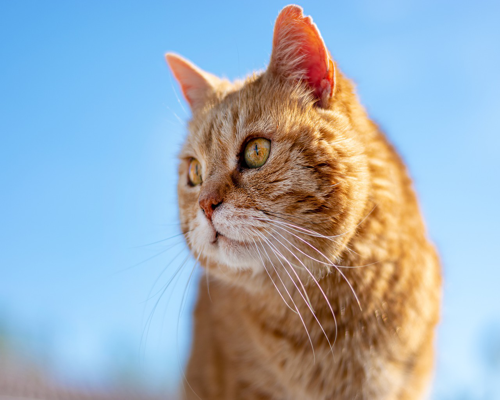

In [8]:
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

## Flip

flip_left_right , flip_up_down 좌우 상하 반전

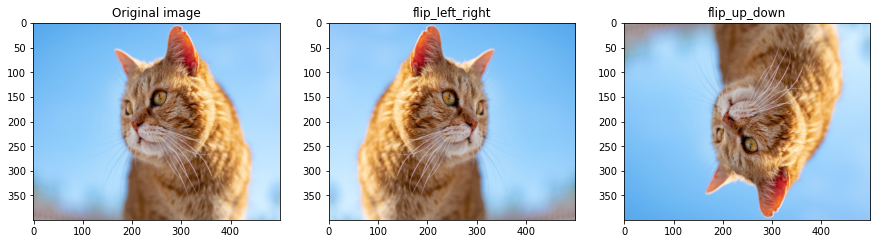

In [9]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(15, 15))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

## random값을 추가해서 원본 데이터도 활용 가능

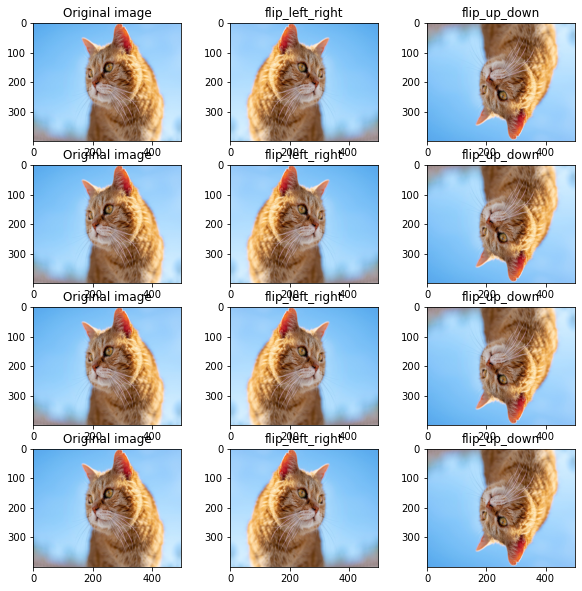

In [10]:
plt.figure(figsize=(10, 10))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

## Center Crop

central_fraction 조절 필수

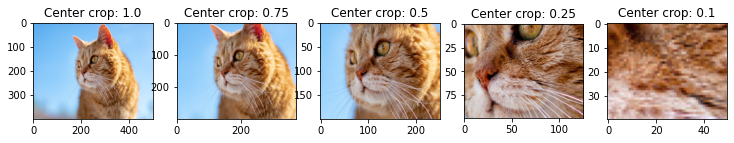

In [17]:
plt.figure(figsize=(15, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

central_crop의 랜덤 함수 만들기

`tf.random.uniform` 을 활용 매개변수 전달 값 생성

In [18]:
def random_central_crop(image_tensor, range=(0, 1)):
    # 0 ~ 1 사이 값 랜던생성
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    # central_crop 으로 랜덤으로 자름
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor

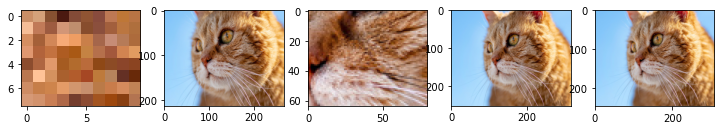

In [37]:
# plt.figure로 기본 plt 설정
plt.figure(figsize=(15, 15))

col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor =random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

## tf. random

tf.random.uniform() 과 tf.random.normal() 의 차이?

랜덤값을 uniform distribution으로 뽑는 것과 normal distribution으로 뽑는 차이 입니다. normal distribution의 경우 mean, std를 통해서 분포를 조절할 수 있습니다.

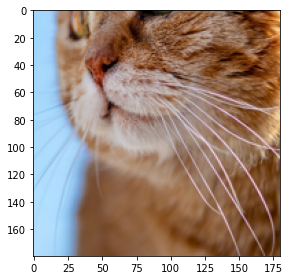

In [40]:
# apply random_crop on cat image
# 여기에 코드를 입력해 주세요.
plt.figure(figsize = (15,15))
random_cropped_tensor = tf.image.random_crop(image_tensor , [180,180,3])
random_cropped_image = tf.keras.preprocessing.image.array_to_img(random_cropped_tensor)

plt.subplot(1,3,1)
plt.imshow(random_cropped_image)

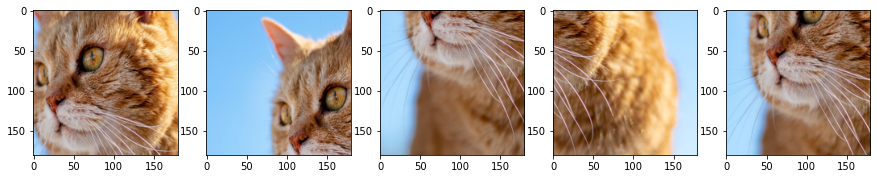

In [42]:
# display 5 random cropped images
# 여기에 코드를 입력해 주세요.
plt.figure(figsize=(15,15))
for i in range(5):
    random_cropped_tensor = tf.image.random_crop(image_tensor , [180,180,3])
    random_cropped_image = tf.keras.preprocessing.image.array_to_img(random_cropped_tensor)

    plt.subplot(1,5,i+1)
    plt.imshow(random_cropped_image)

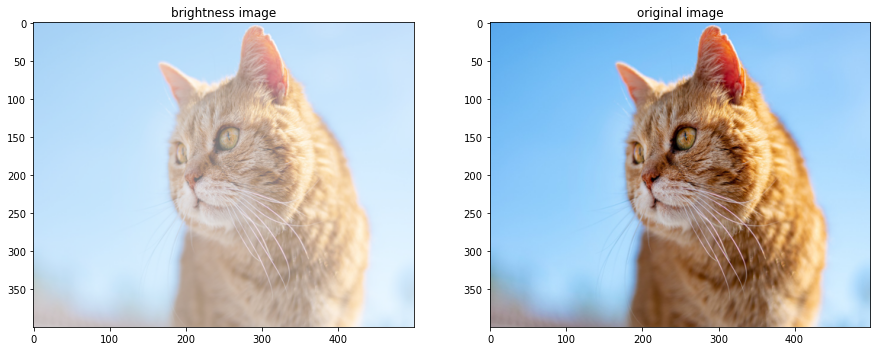

In [50]:
plt.figure(figsize=(15,15))

random_brightness_tensor = tf.image.random_brightness(image_tensor, 255)
random_brightness_image = tf.keras.preprocessing.image.array_to_img(random_brightness_tensor)

plt.subplot(1,2,1)
plt.title('brightness image')
plt.imshow(random_brightness_image)
plt.subplot(1,2,2)
plt.title('original image')
plt.imshow(image)

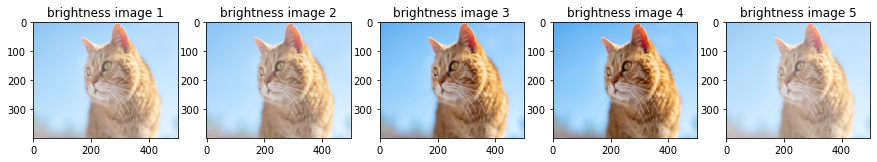

In [54]:
plt.figure(figsize=(15,15))

for i in range(5):
    random_brightness_tensor = tf.image.random_brightness(image_tensor, 255)
    random_brightness_image = tf.keras.preprocessing.image.array_to_img(random_brightness_tensor)

    plt.subplot(1,5,1+i)
    plt.title('brightness image {}'.format(i+1))
    plt.imshow(random_brightness_image)

## imgaug 라이브러리 사용
[imgaug 라이브러리](https://github.com/aleju/imgaug)

[overview of imgaug](https://imgaug.readthedocs.io/en/latest/source/overview_of_augmenters.html)

In [56]:
!pip install -q imgaug

`imgaug` 에서 배열을 이미지의 기본 형태로 사용, PIL Image 데이터형을 넘파이 배열로 

변환하여 사용

In [57]:
import numpy as np
import imgaug.augmenters as iaa

image_arr = np.array(image)

`iaa.Affine()`

Affine transform 아핀변환 활용 이미지 적용

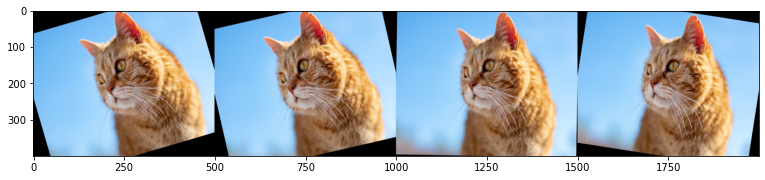

In [58]:
images = [image_arr, image_arr, image_arr, image_arr]
rotate = iaa.Affine(rotate=(-25, 25))
images_aug = rotate(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

`iaa.Crop()`

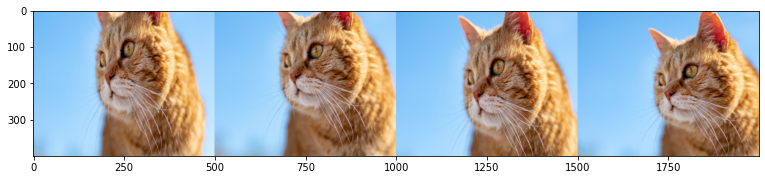

In [59]:
images = [image_arr, image_arr, image_arr, image_arr]
crop = iaa.Crop(percent=(0, 0.2))
images_aug = crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

`iaa.Sequential()`

augmentation 기법들을 한 번에 조합하여 사용 `imgaug` 에서 `iaa.Sequential`를

사용해서 순차적으로 적용 가능

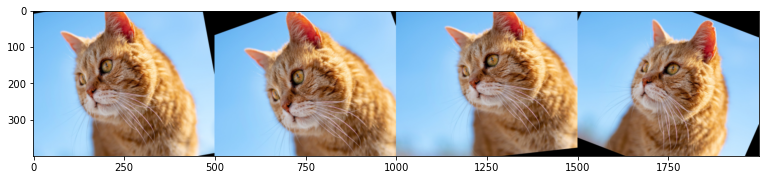

In [60]:
images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.Crop(percent=(0, 0.2))
])
images_aug = rotate_crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

random step

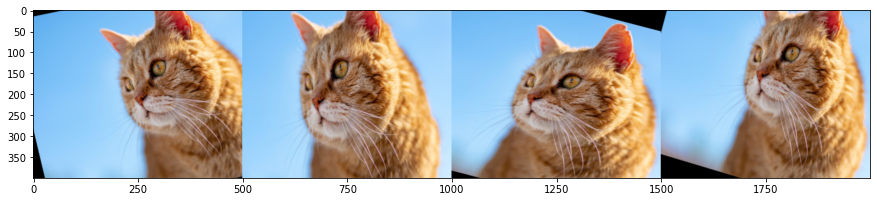

In [62]:
# Modify iaa.sequential to use random step
# 여기에 코드를 입력하세요.

images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([
    iaa.Crop(percent=(0, 0.2)),
    iaa.Affine(rotate=(-25, 25)),
], random_order=True)
images_aug = rotate_crop(images=images)
plt.figure(figsize=(15,15))
plt.imshow(np.hstack(images_aug))

`iaa.OneOf()` grayscale , saturation

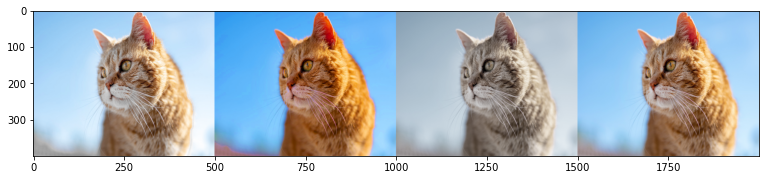

In [63]:
images = [image_arr, image_arr, image_arr, image_arr]
seq = iaa.OneOf([
     iaa.Grayscale(alpha=(0.0, 1.0)),
     iaa.AddToSaturation((-50, 50))
])
images_aug = seq(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

`iaa.Sometimes()` 활용하여 확률로 선택하게 함

[참고 : imgaug sometimes](https://imgaug.readthedocs.io/en/latest/source/overview/meta.html#sometimes)

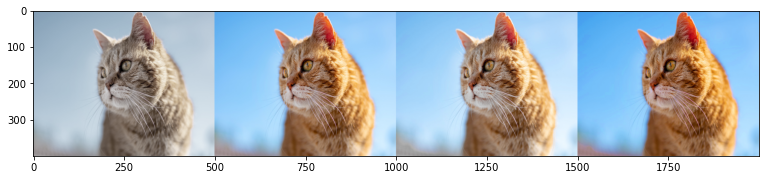

In [65]:
images = [image_arr, image_arr, image_arr, image_arr]
seq = iaa.Sometimes(
    0.6,
    iaa.AddToSaturation((-50,50)),
    iaa.Sometimes(
        0.3,
        iaa.Grayscale(alpha=(0.0, 1.0))    
    )
)
images_aug = seq(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

iaa.Sequntial() , iaa.OneOf(), iaa,Sometimes() 을 다양하게 활용

총 100장 출력

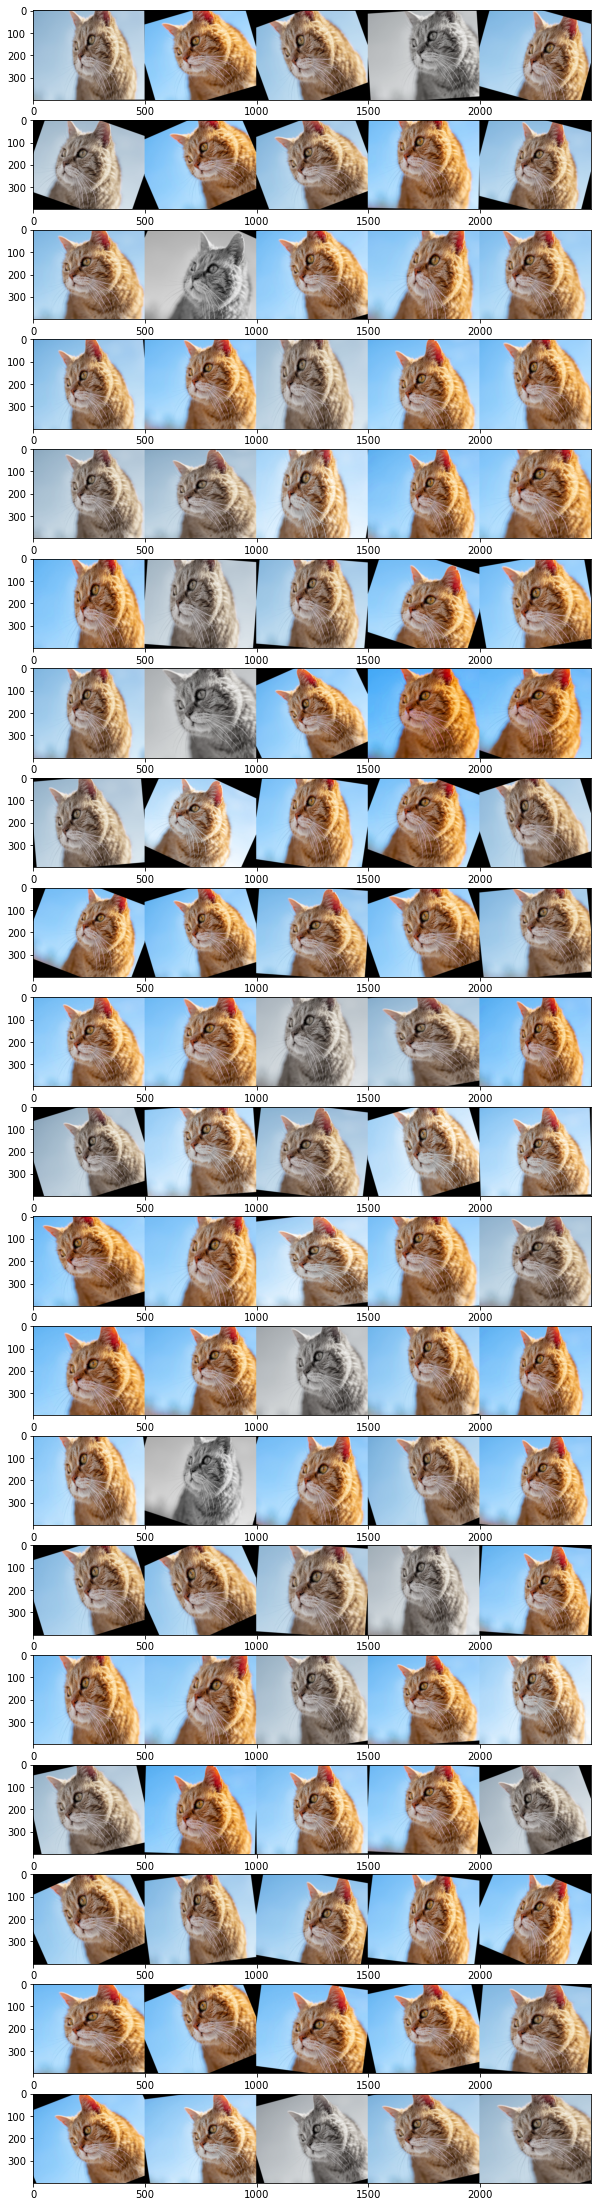

In [66]:
seq = iaa.Sequential([
    iaa.OneOf([
         iaa.Grayscale(alpha=(0.0, 1.0)),
         iaa.Sometimes(
             0.5,
             iaa.AddToSaturation((-50, 50))
         )
    ]),
    iaa.Sequential([
        iaa.Crop(percent=(0, 0.2)),
        iaa.Affine(rotate=(-25, 25)),
    ], random_order=True)
])

plt.figure(figsize=(10, 40))
for i in range(20):
    images = [image_arr, image_arr, image_arr, image_arr, image_arr]
    images_aug = seq(images=images)
    plt.subplot(20,1,i+1)
    plt.imshow(np.hstack(images_aug))

plt.show()